In [178]:
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

pd.options.mode.chained_assignment = None  # default='warn'


In [179]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# read in data 

data based on the UCI diabetes set 
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

full data attributes described here: 
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [180]:
obesity = pd.read_csv("/Users/christacaggiano/Documents/UCLA_year4/horizons/obesity.csv")

In [181]:
# make outcome binary for this exercise 
obesity["overweight"] = np.where(obesity.NObeyesdad.str.contains("Obesity") |
                                 obesity.NObeyesdad.str.contains("Overweight"), 
                                 1, 0) 

In [182]:
obesity = obesity.drop("NObeyesdad", axis=1)

In [183]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,overweight
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1


# data properties
make some plots to explore the data attributes and their underlying properties 

# data preparation

In [33]:
def make_boolean(column): 
    return column.replace({"yes":1, "no":0})    

In [34]:
def make_scale(column): 
    return column.replace({"no":0, "Sometimes":1, "Frequently":2, "Always":3})    

In [35]:
# numerical data is best for a ML algorithm. We can start by making the yes/no columns boolean 

obesity["family_history_with_overweight"] = make_boolean(obesity["family_history_with_overweight"])
obesity["FAVC"] = make_boolean(obesity["FAVC"])
obesity["SMOKE"] = make_boolean(obesity["SMOKE"])
obesity["SCC"] = make_boolean(obesity["SCC"])

In [36]:
# recode sex as boolean too 

obesity["Gender"] = obesity["Gender"].replace({"Female":1, "Male":0})

In [37]:
# we also have categorical data, that is a scale - "no" on one end of the spectrum, 
# "always" on the other end. this data could be coded a few ways, but here I chose 
# numerically, with "no" being 0, and "always" being 4 

obesity["CALC"] = make_scale(obesity["CALC"])
obesity["CAEC"] = make_scale(obesity["CAEC"])

In [38]:
# lastly, we have strictly categorical data. there is no inherent numbering between the methods 
# of transportation column- "Public_transportation" isn't necessarily higher than "walking". 
# so instead, we one hot encode these. This transforms them into numbers that work with the 
# algorithm, but keeps the inherent lack of relationship between the variables 

transport = pd.get_dummies(obesity["MTRANS"])
obesity = obesity.drop("MTRANS", axis = 1)
obesity = obesity.join(transport)

In [39]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,overweight,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,0,0,0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,0,0,0,0,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,0,0,0,0,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,1,0,0,0,0,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,1,0,0,0,1,0


# logistic regression
use a logistic regression model to use whatever combination of attributes you'd like to predict whether the individual is overweight (use "overweight" column as output) 

### test/train split 

### define model

### fit model 

### test model

### evaluate model

# neural network 

In [78]:
# here we are separating our data into outcome and input variables 

Y = obesity[["overweight"]].values
X = obesity.drop("overweight", axis=1).values

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [151]:
# create a simple neural network with 2 8-node layers ("dense" means a "normal" NN layer)
# and one output layer, that gives our one dimensional output. 
# the "sigmoid" function gives us an output that is between 0/1, which is consistent with 
# our binary classification task 

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [158]:
# this defines more parameters about how the model is trained. 
# we ust a binary cross entropy loss function because we have a binary classification task 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### model training 

In [161]:
# we train the data in "epochs"- the more epochs, the more the data is run though the NN 
# for something simple like this, 15 epochs is fine, but in the future we might want to fit more 

history = model.fit(x_train, y_train, epochs=15, batch_size=10, verbose=0)

### assessing model training

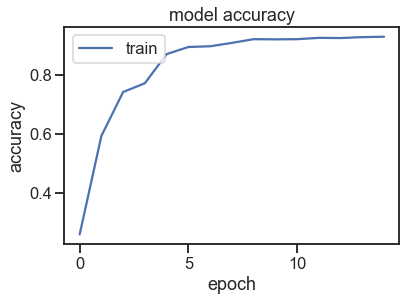

In [154]:
# we can assess how well the model /training/ step is doing (so not testing yet) by looking at how 
# accurate the model is on our training set. The ideal is for this to be as close to one as possible
# if it's not at one, we might want more layers, more epochs, or to revisit how our model is defined

plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

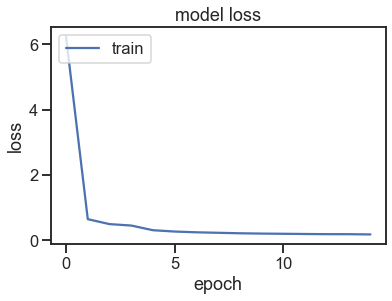

In [155]:
# here we are also evaluating the training, looking at the loss function. a NN tries to minimize 
# the loss, so we want this number to be as close to 0 as possible 

plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

### evaluating the model 

In [156]:
# here we are finally seeing how well the model does on our test set in terms of 
# average loss (first number) and average accuracy (second number)
score = model.evaluate(x_test, y_test, verbose=0)
score

In [165]:
# here we can see the predictions 
# the predictions are probabilities that an individual is overeight or not 
# less than 0.5 is not overweight, greater or equal is overweight 
predictions = model.predict(x_test)
predictions.round(1)

array([[1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.9],
       [0.3],
       [1. ],
       [0. ],
       [1. ],
       [0.6],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.4],
       [1. ],
       [1. ],
       [1. ],
       [0.8],
       [0.9],
       [1. ],
       [0.6],
       [0.9],
       [1. ],
       [0.2],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [0.8],
       [0.2],
       [0.5],
       [0.9],
       [0. ],
       [0.8],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [0.1],
       [0.1],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.8],
       [0.9],
       [1. ],
       [0.1],
       [1. ],
       [0. ],
       [1. ],
       [0.1],
       [0. ],
       [1. ],
       [0.2],
       [1. ],
       [0.7],
       [1. ],
       [0.7],
      

In [171]:
# this numpy function makes everything the classic 0/1 that we expect 
np.rint(predictions)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [172]:
# a confusion matrix can help us visualize where the model is misclassifying individuals 
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))

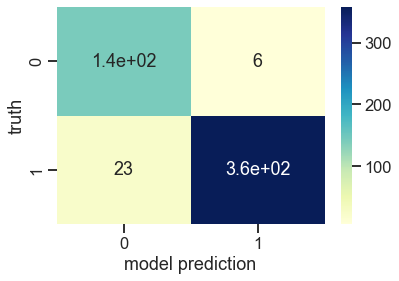

In [176]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()